In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.datasets import cifar10

#### _Load the data and split into Train and Test sets_

In [15]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [16]:
#Inspect the data
print(f"X_train shape:{X_train.shape}")
print(f"Y_train shape:{Y_train.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"Y_test shape:{Y_test.shape}")
print(f"Number of training examples/images:{X_train.shape[0]}")
print(f"Number of testing examples/images:{X_test.shape[0]}")

X_train shape:(50000, 32, 32, 3)
Y_train shape:(50000, 1)
X_test shape:(10000, 32, 32, 3)
Y_test shape:(10000, 1)
Number of training examples/images:50000
Number of testing examples/images:10000


#### _Single image visualisation_

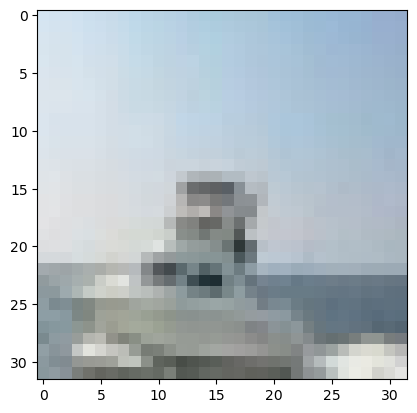

Label:ship


In [17]:
# Visualize the images in the training dataset
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index = 100
plt.imshow(X_train[index])
plt.show()
print(f"Label:{class_names[Y_train[index][0]]}")

#### _Multiple image visualisation_

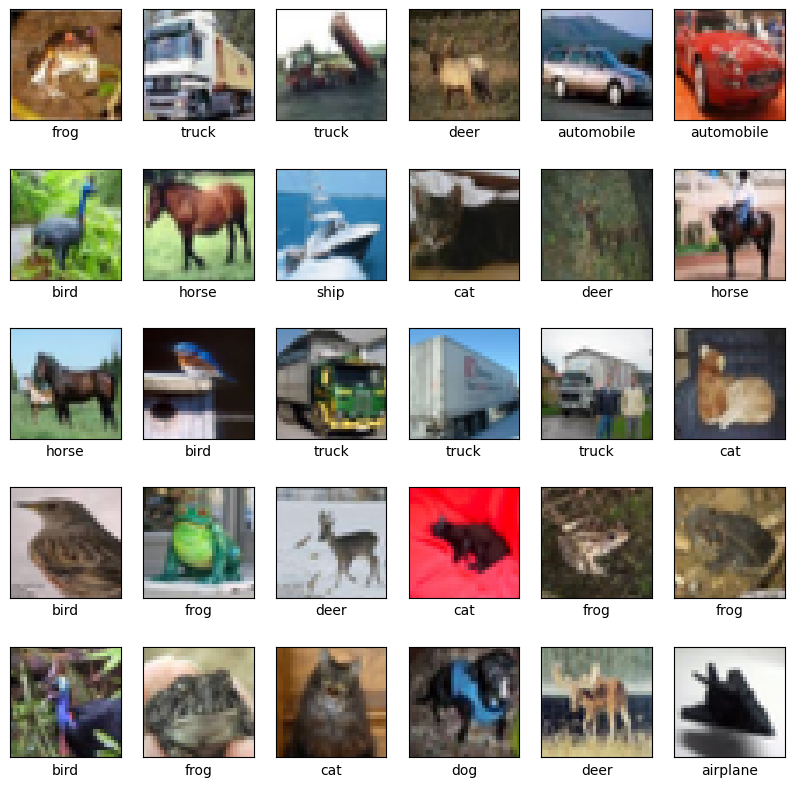

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(visible=False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

### _Data Preprocessing_

In [19]:
# Normalize the images
X_train = X_train/255.0
X_test = X_test/255.0

#Convert labels to one hot encoded vectors
Y_train = tf.keras.utils.to_categorical(Y_train,num_classes=10)
Y_test = tf.keras.utils.to_categorical(Y_test,num_classes=10)

### _Binary Classification Model with Sequential API_

In [20]:
# Convert the labels to a binary classification problem (Airplane vs Not Airplane)
Y_train_binary = np.where(Y_train[:,0] == 1,1,0) # class 0 for Airplane
Y_test_binary = np.where(Y_test[:,0] == 1,1,0)

# Build the Sequential model
binary_model = tf.keras.Sequential([
    tfl.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    tfl.MaxPooling2D(pool_size=(2,2)), #strides=(1,1), #padding='valid' Why are we not using these args?? 
    tfl.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tfl.MaxPooling2D(pool_size=(2,2)),
    tfl.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tfl.MaxPooling2D(pool_size=(2,2)),
    tfl.Flatten(),
    tfl.Dense(128, activation='relu'), 
    tfl.Dropout(0.5),
    tfl.Dense(1, activation='sigmoid')
])

In [21]:
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# binary_model.summary()
binary_history = binary_model.fit(X_train, Y_train_binary, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10


2024-08-02 12:46:47.306002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


624/625 [============================>.] - ETA: 0s - loss: 0.2632 - accuracy: 0.9053

2024-08-02 12:46:58.695343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 13s 20ms/step - loss: 0.2634 - accuracy: 0.9053 - val_loss: 0.2235 - val_accuracy: 0.9120
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2081 - accuracy: 0.9224 - val_loss: 0.1879 - val_accuracy: 0.9265
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1824 - accuracy: 0.9327 - val_loss: 0.1763 - val_accuracy: 0.9345
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1627 - accuracy: 0.9394 - val_loss: 0.1684 - val_accuracy: 0.9391
Epoch 5/10
625/625 [==============================] - 10s 17ms/step - loss: 0.1487 - accuracy: 0.9449 - val_loss: 0.1620 - val_accuracy: 0.9405
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1350 - accuracy: 0.9501 - val_loss: 0.1544 - val_accuracy: 0.9431
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1238 - accuracy: 0.9531 - val_loss: 0.1471 - val_accuracy: 0.9471
Epo

### _Multiclass Classification Model with Functional API_

In [22]:
# Build the model
input_img = tf.keras.Input(shape=(32,32,3))

# Convolutional layers with ReLu activation and MaxPooling
Z1 = tfl.Conv2D(filters=32, kernel_size=(3,3))(input_img)
A1 = tfl.ReLU()(Z1)
P1 = tfl.MaxPooling2D(pool_size=(2,2))(A1)
Z2 = tfl.Conv2D(64, (3,3))(P1)
A2 = tfl.ReLU()(Z2)
P2 = tfl.MaxPooling2D((2,2))(A2)
Z3 = tfl.Conv2D(128, (3,3))(P2)
A3 = tfl.ReLU()(Z3)
P3 = tfl.MaxPooling2D((2,2))(A3)

# Flatten and Dense layer
F = tfl.Flatten()(P3)
FC1 = tfl.Dense(units=128, activation='relu')(F)
D = tfl.Dropout(0.5)(FC1)

# Output layer
output_layer = tfl.Dense(units=10, activation='softmax')(D)

functional_model = tf.keras.Model(inputs=input_img, outputs=output_layer)

In [23]:
functional_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# functional_model.summary()
functional_history = functional_model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30


2024-08-02 12:48:36.537010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


623/625 [============================>.] - ETA: 0s - loss: 1.7763 - accuracy: 0.3375

2024-08-02 12:48:52.187546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 18s 25ms/step - loss: 1.7755 - accuracy: 0.3377 - val_loss: 1.3725 - val_accuracy: 0.5029
Epoch 2/30
625/625 [==============================] - 15s 24ms/step - loss: 1.3650 - accuracy: 0.5077 - val_loss: 1.2149 - val_accuracy: 0.5677
Epoch 3/30
625/625 [==============================] - 15s 24ms/step - loss: 1.2278 - accuracy: 0.5656 - val_loss: 1.1009 - val_accuracy: 0.6148
Epoch 4/30
625/625 [==============================] - 15s 24ms/step - loss: 1.1426 - accuracy: 0.6003 - val_loss: 1.0595 - val_accuracy: 0.6391
Epoch 5/30
625/625 [==============================] - 14s 23ms/step - loss: 1.0823 - accuracy: 0.6255 - val_loss: 1.0723 - val_accuracy: 0.6287
Epoch 6/30
625/625 [==============================] - 11s 17ms/step - loss: 1.0304 - accuracy: 0.6445 - val_loss: 0.9543 - val_accuracy: 0.6703
Epoch 7/30
625/625 [==============================] - 10s 16ms/step - loss: 0.9999 - accuracy: 0.6585 - val_loss: 0.9712 - val_accuracy: 0.6697
Epo

### _Model evaluation_

In [24]:
# Evaluate the binary classification model
binary_test_loss, binary_test_acc = binary_model.evaluate(X_test,Y_test_binary)
print(f"Binary classification test loss: {binary_test_loss}")
print(f"Binary classification test accuracy: {binary_test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.1723 - accuracy: 0.9387
Binary classification test loss: 0.17227399349212646
Binary classification test accuracy: 0.9387000203132629


In [25]:
# Evaluate the multiclass classification model
multiclass_test_loss, multiclass_test_acc = functional_model.evaluate(X_test, Y_test)
print(f"Multiclass classification test loss: {multiclass_test_loss}")
print(f"Multiclass classification test accuracy: {multiclass_test_acc}")

313/313 [==============================] - 3s 10ms/step - loss: 1.2774 - accuracy: 0.6970
Multiclass classification test loss: 1.2773725986480713
Multiclass classification test accuracy: 0.6970000267028809


### _Plot accuracy_

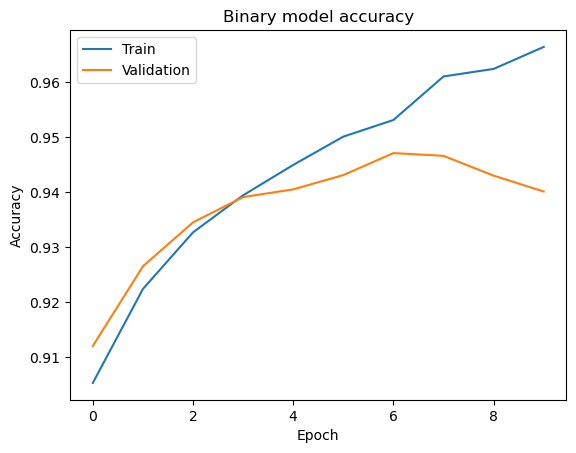

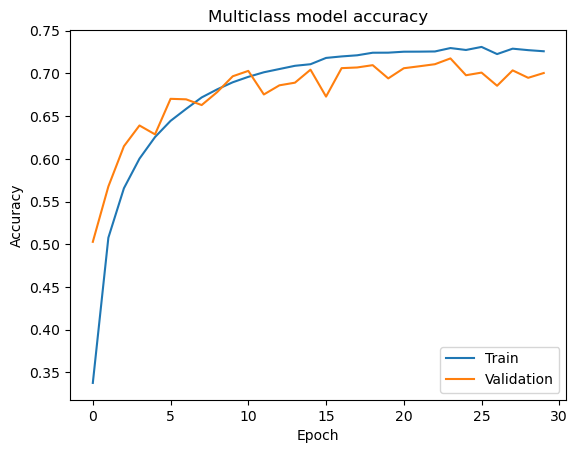

In [26]:
# Plot training and validation accuracy
# Binary class model
plt.plot(binary_history.history["accuracy"])
plt.plot(binary_history.history["val_accuracy"])
plt.title("Binary model accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

# Multiclass model
plt.plot(functional_history.history['accuracy'])
plt.plot(functional_history.history['val_accuracy'])
plt.title('Multiclass model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()

### _Save and Load_

In [43]:
binary_model.save('cifar10-binary-model.h5')
functional_model.save('cifar10-functional-model.h5')

In [49]:
from tensorflow.keras.models import load_model
loaded_multiclass_model = load_model('cifar10-functional-model.h5')
loaded_test_loss, loaded_test_acc = loaded_multiclass_model.evaluate(X_test, Y_test)
print(f"Loaded model test accuracy: {loaded_test_acc}")

 11/313 [>.............................] - ETA: 3s - loss: 1.1634 - accuracy: 0.7131

2024-08-02 14:04:10.952757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 1.2774 - accuracy: 0.6970
Loaded model test accuracy: 0.6970000267028809
